# Principal Component Analysis with Cancer Data

In [115]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [116]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cancer.csv").dropna()

In [117]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [118]:
df.shape

(699, 11)

In [119]:
df.duplicated().sum()

8

Remove duplicate entries from same patient. Don't remove values from different patients

In [120]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [121]:
#The results suggest there are 8 duplicate rows in the breast cancer dataset. 
#Although such duplicate rows may correspond to samples for different individuals, duplicates may be
#the samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [122]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
df=df.drop(['ID'],axis=1)
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [123]:
df.shape

(691, 10)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null object
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.4+ KB


In [125]:
df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [126]:
df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [127]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,691.0,4.426918,2.815861,1.0,2.0,4.0,6.0,10.0
Cell Size,691.0,3.130246,3.041328,1.0,1.0,1.0,5.0,10.0
Cell Shape,691.0,3.201158,2.959886,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,691.0,2.824891,2.866552,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,691.0,3.211288,2.199852,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,691.0,3.435601,2.442345,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,691.0,2.882779,3.066298,1.0,1.0,1.0,4.0,10.0
Mitoses,691.0,1.593343,1.723129,1.0,1.0,1.0,1.0,10.0
Class,691.0,2.688857,0.951051,2.0,2.0,2.0,4.0,4.0


In [128]:
df.shape

(691, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [129]:
# We could see "?" values in column, this should be removed from data set
df.isnull().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

#Bare nuclei col is missing
temp = pd.df(df.Bare_Nuclei.str.isdigit())  
temp[temp['Bare_Nuclei'] == False]   

df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()),axis=0)


#converting the hp column from object 'Bare Nuclei'/ string type to float
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('float64') 

In [130]:
# No missing values found. So let us try to remove ? from bare nuclei column
temp = pd.DataFrame(X["Bare Nuclei"].str.isdigit()) 
temp[temp['Bare Nuclei'] == False]

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [131]:
# Get count of rows having ?
temp[temp['Bare Nuclei'] == False].count()

Bare Nuclei    16
dtype: int64

In [132]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
df = df.replace('?', np.nan)

In [133]:
# Conver "Object" to "float64"
df['Bare Nuclei'] = df['Bare Nuclei'].astype('float64')  

In [134]:
df = df.fillna(df.mean())

In [135]:
#Duplicate Data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df.loc[[11,28]]

Number of duplicate rows = 228


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


The results suggest there are 234 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [136]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of rows before discarding duplicates = 691
Number of rows after discarding duplicates = 463


# Q4. Perform bi variate analysis including correlation & pairplots. 


In [86]:
# Check for correlation of variable
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.578156,0.588956,0.383573,0.432165,0.505538,0.496158,0.450853,0.296797,0.675748
Cell Size,0.578156,1.000000,0.877404,0.640096,0.689982,0.587316,0.712986,0.657170,0.403911,0.757623
Cell Shape,0.588956,0.877404,1.000000,0.612415,0.649388,0.615248,0.687331,0.654724,0.381645,0.757932
Marginal Adhesion,0.383573,0.640096,0.612415,1.000000,0.528163,0.587555,0.611294,0.514134,0.358434,0.622371
Single Epithelial Cell Size,0.432165,0.689982,0.649388,0.528163,1.000000,0.478869,0.554625,0.558757,0.434875,0.604709
Bare Nuclei,0.505538,0.587316,0.615248,0.587555,0.478869,1.000000,0.603961,0.472790,0.261848,0.754222
Normal Nucleoli,0.496158,0.712986,0.687331,0.611294,0.554625,0.603961,1.000000,0.607259,0.279795,0.707166
Bland Chromatin,0.450853,0.657170,0.654724,0.514134,0.558757,0.472790,0.607259,1.000000,0.369716,0.639909
Mitoses,0.296797,0.403911,0.381645,0.358434,0.434875,0.261848,0.279795,0.369716,1.000000,0.360433
Class,0.675748,0.757623,0.757932,0.622371,0.604709,0.754222,0.707166,0.639909,0.360433,1.000000


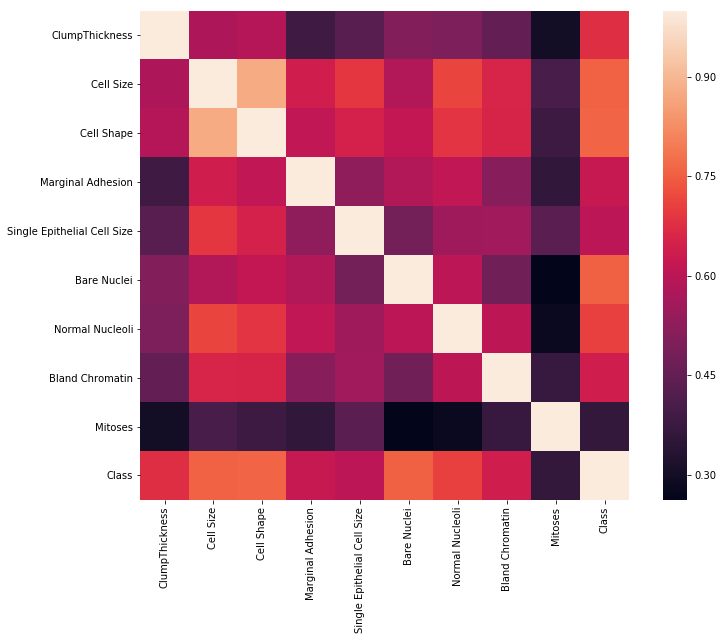

In [87]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

1.Target variable shows high correlation with most of these variables.

2.Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin.

3.Cell shape shows high significance with cell size,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin.

4.Normal nucleoli shows high significance with bland chromatin and bare nuclei.

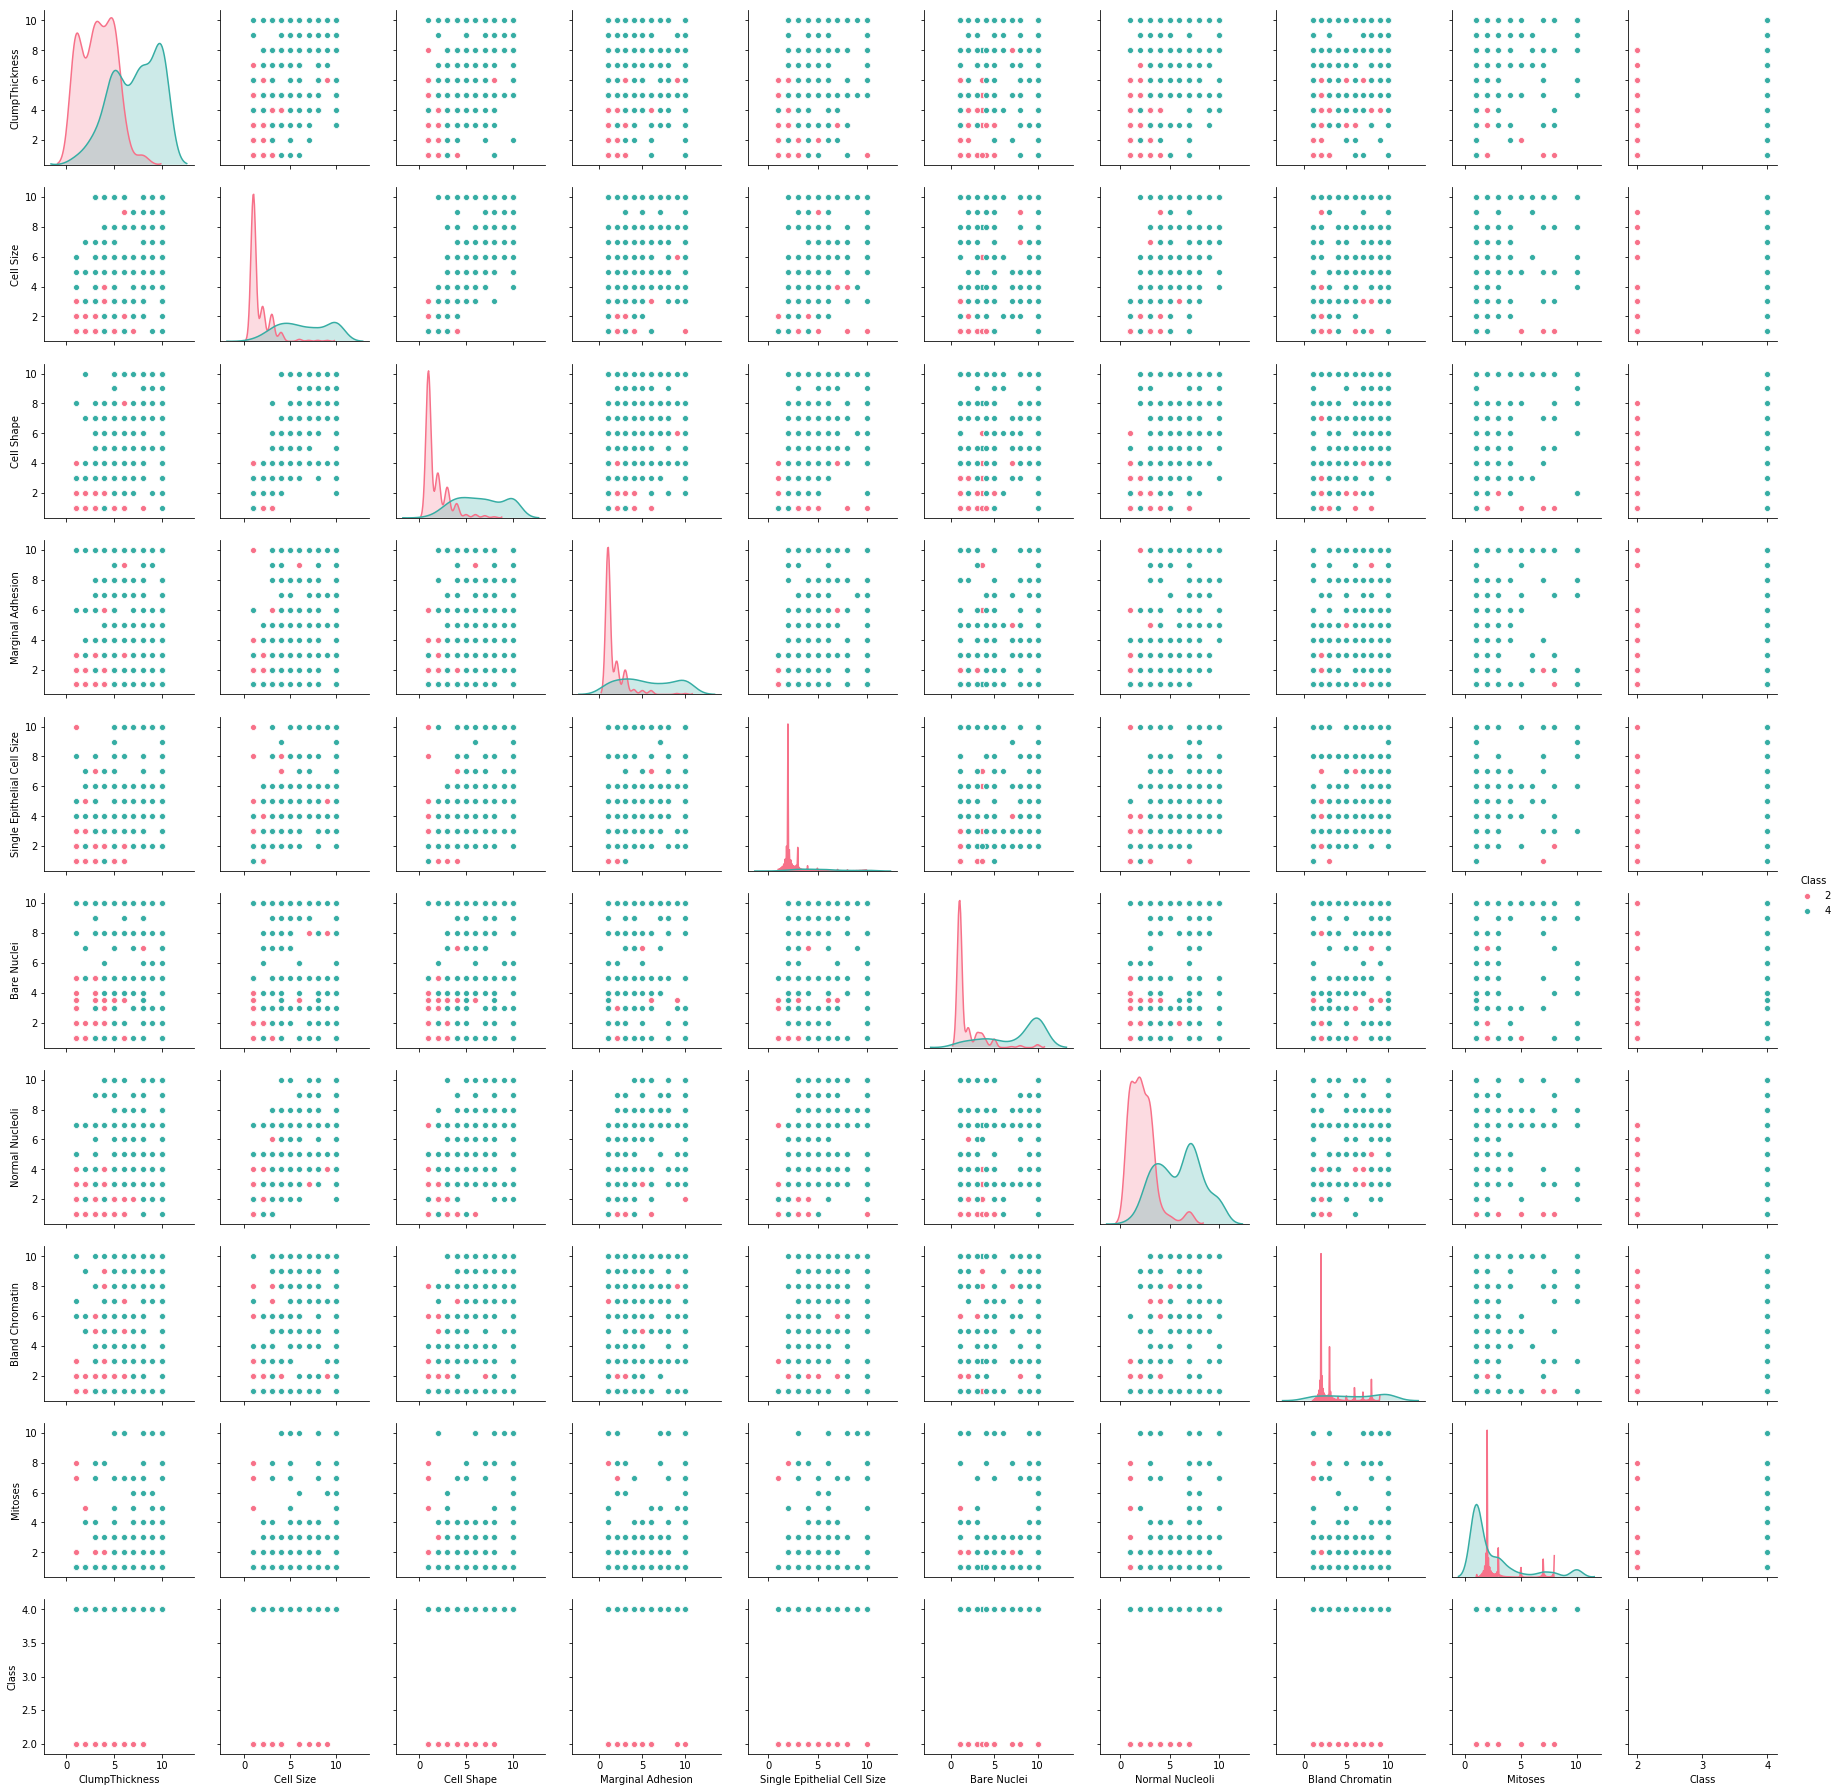

In [89]:
sns.pairplot(df,hue="Class", palette="husl")

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

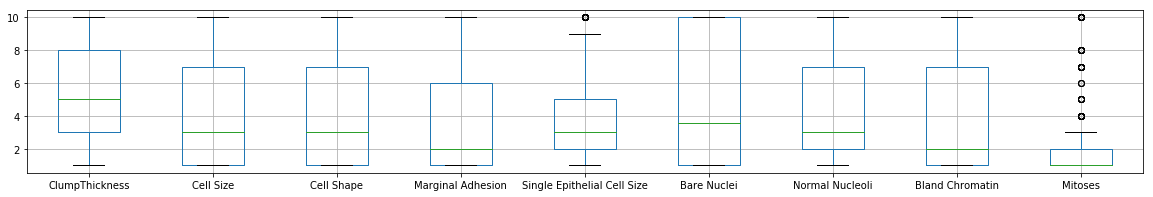

In [90]:
# We could see most of the outliers are now removed.
df2 = df.drop(['Class'],axis=1)
df2.boxplot(figsize=(20,3))

The boxplots suggest that only 2 of the columns ( Single Epithetial Cell Size,and Mitoses) contain abnormally high values.

Skewness :  1.1591950748499662
Kurtosis :  0.4430224977363837


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


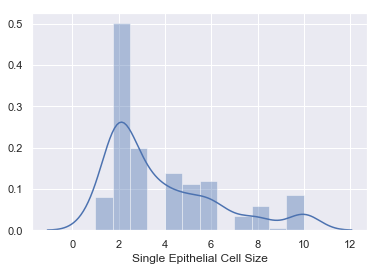

In [91]:
print('Skewness : ',df2["Single Epithelial Cell Size"].skew())
print('Kurtosis : ',df2["Single Epithelial Cell Size"].kurtosis())
sns.set()
x1 = df2["Single Epithelial Cell Size"]
ax = sns.distplot(x1)

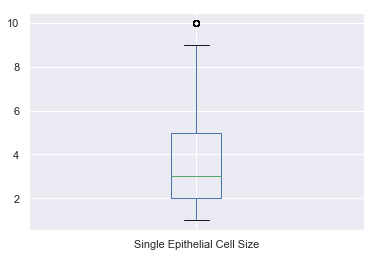

In [92]:
df2["Single Epithelial Cell Size"].plot(kind='box')

In [93]:
Q3 = df2["Single Epithelial Cell Size"].quantile(0.75)
Q1 = df2["Single Epithelial Cell Size"].quantile(0.25)
diff = Q3-Q1
Above_outliers = Q3+diff
Below_outliers = Q1-diff
print("Above outliers : {}".format(Above_outliers))
print("Below outliers : {}".format(Below_outliers))

Above outliers : 8.0
Below outliers : -1.0


In [95]:
mean1 = df2["Single Epithelial Cell Size"].loc[df2["Single Epithelial Cell Size"]<=Above_outliers].max()
df2["Single Epithelial Cell Size"] = df2["Single Epithelial Cell Size"].mask(df2["Single Epithelial Cell Size"]>Above_outliers,mean1)


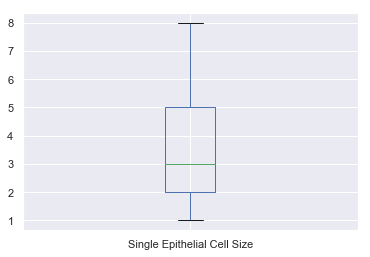

In [97]:
df2["Single Epithelial Cell Size"].plot(kind='box')

Skewness :  2.7576391652953136
Kurtosis :  7.038948340627625


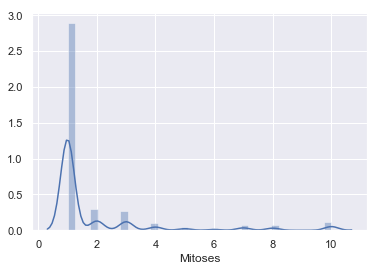

In [98]:
print('Skewness : ',df2["Mitoses"].skew())
print('Kurtosis : ',df2["Mitoses"].kurtosis())
sns.set()
x1 = df2["Mitoses"]
ax = sns.distplot(x1)

In [99]:
Q3 = df2["Mitoses"].quantile(0.75)
Q1 = df2["Mitoses"].quantile(0.25)
diff = Q3-Q1
Above_outliers = Q3+diff
Below_outliers = Q1-diff
print("Above outliers : {}".format(Above_outliers))
print("Below outliers : {}".format(Below_outliers))

Above outliers : 3.0
Below outliers : 0.0


In [100]:
mean1 = df2["Mitoses"].loc[df2["Mitoses"]<=Above_outliers].max()
df2["Mitoses"] = df2["Mitoses"].mask(df2["Mitoses"]>Above_outliers,mean1)

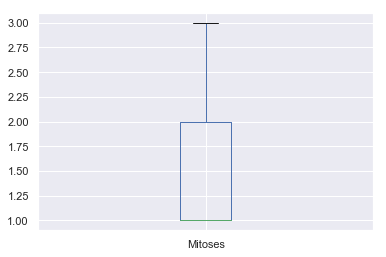

In [101]:
df2["Mitoses"].plot(kind='box')

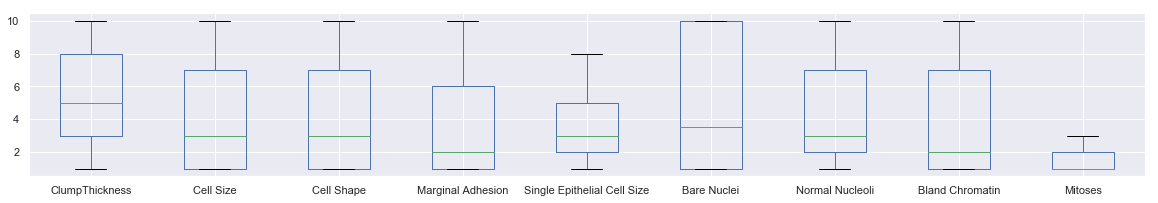

In [102]:
df2.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [104]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

sc = StandardScaler()
X_std =  sc.fit_transform(df2)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Covariance Matrix 
%s [[1.0021645  0.57940715 0.59023092 0.38440306 0.44576586 0.50663207
  0.49723228 0.45182864 0.3625341 ]
 [0.57940715 1.0021645  0.87930297 0.64148161 0.71384512 0.58858704
  0.71452956 0.65859238 0.43493401]
 [0.59023092 0.87930297 1.0021645  0.61374096 0.67489136 0.61657994
  0.68881824 0.65614155 0.39963566]
 [0.38440306 0.64148161 0.61374096 1.0021645  0.55348287 0.58882723
  0.61261758 0.5152469  0.40137357]
 [0.44576586 0.71384512 0.67489136 0.55348287 1.0021645  0.50812791
  0.57948349 0.5965022  0.43631028]
 [0.50663207 0.58858704 0.61657994 0.58882723 0.50812791 1.0021645
  0.60526836 0.47381321 0.3598699 ]
 [0.49723228 0.71452956 0.68881824 0.61261758 0.57948349 0.60526836
  1.0021645  0.60857354 0.31601183]
 [0.45182864 0.65859238 0.65614155 0.5152469  0.5965022  0.47381321
  0.60857354 1.0021645  0.41490006]
 [0.3625341  0.43493401 0.39963566 0.40137357 0.43631028 0.3598699
  0.31601183 0.41490006 1.0021645 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [105]:
# Obtaining eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.29290375  0.00249088 -0.00975841  0.85153831 -0.06780336 -0.23228427
   0.28633597  0.21951725  0.01609608]
 [-0.38732277  0.73727129  0.09754812 -0.02902502 -0.20691324  0.33603933
  -0.23436074  0.17179172  0.23639195]
 [-0.38197346 -0.65877535  0.145209    0.04029991 -0.18743838  0.52367047
  -0.20565137  0.0984911   0.18985438]
 [-0.32748178 -0.03988579  0.05525981 -0.38245243  0.47929164 -0.05033034
   0.45442416  0.54701656  0.06212285]
 [-0.3409063  -0.07217146 -0.07938848 -0.24275525 -0.29067028 -0.44156746
   0.22529608 -0.40806359  0.5626689 ]
 [-0.32243929  0.08372466  0.15558178  0.15245012  0.62576583  0.19861761
   0.02195129 -0.63446734 -0.0866825 ]
 [-0.35012902 -0.07828571  0.29864067 -0.08939849  0.05618181 -0.55739617
  -0.59597726  0.1207554  -0.3008073 ]
 [-0.3319148   0.0357305  -0.04408465 -0.18968176 -0.43198189  0.10594717
   0.37420806 -0.16782811 -0.69613373]
 [-0.24103622 -0.03500211 -0.9190277  -0.00192472  0.14798364  0.003407

# Q8 Find variance and cumulative variance by each eigen vector

In [106]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.449104880744553, array([-0.29290375, -0.38732277, -0.38197346, -0.32748178, -0.3409063 ,
       -0.32243929, -0.35012902, -0.3319148 , -0.24103622])), (0.7665522252514841, array([-0.00975841,  0.09754812,  0.145209  ,  0.05525981, -0.07938848,
        0.15558178,  0.29864067, -0.04408465, -0.9190277 ])), (0.6476577642542902, array([ 0.85153831, -0.02902502,  0.04029991, -0.38245243, -0.24275525,
        0.15245012, -0.08939849, -0.18968176, -0.00192472])), (0.5952949503489955, array([-0.06780336, -0.20691324, -0.18743838,  0.47929164, -0.29067028,
        0.62576583,  0.05618181, -0.43198189,  0.14798364])), (0.4240908264627795, array([ 0.01609608,  0.23639195,  0.18985438,  0.06212285,  0.5626689 ,
       -0.0866825 , -0.3008073 , -0.69613373, -0.06898176])), (0.37866966131525887, array([ 0.21951725,  0.17179172,  0.0984911 ,  0.54701656, -0.40806359,
       -0.63446734,  0.1207554 , -0.16782811,  0.03948821])), (0.3294535060677131, array([ 0.28633597, -0.23436074, -0.20565137,  0

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [107]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 9 entries as there are 9 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 9 entries with 9 th entry 
# cumulative reaching almost 100%

In [108]:
cum_var_exp

array([0.60414842, 0.68913693, 0.76094348, 0.8269445 , 0.87396393,
       0.91594746, 0.95247435, 0.98712864, 1.        ])

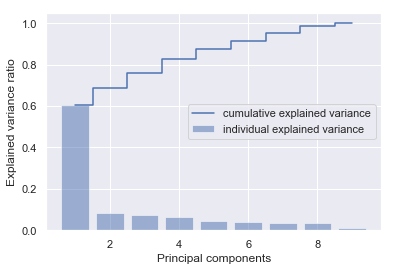

In [109]:
import matplotlib.pyplot as plt 
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [110]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 10 to 7 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

In [112]:
Proj_data_can_df = Proj_data_df.join(y)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


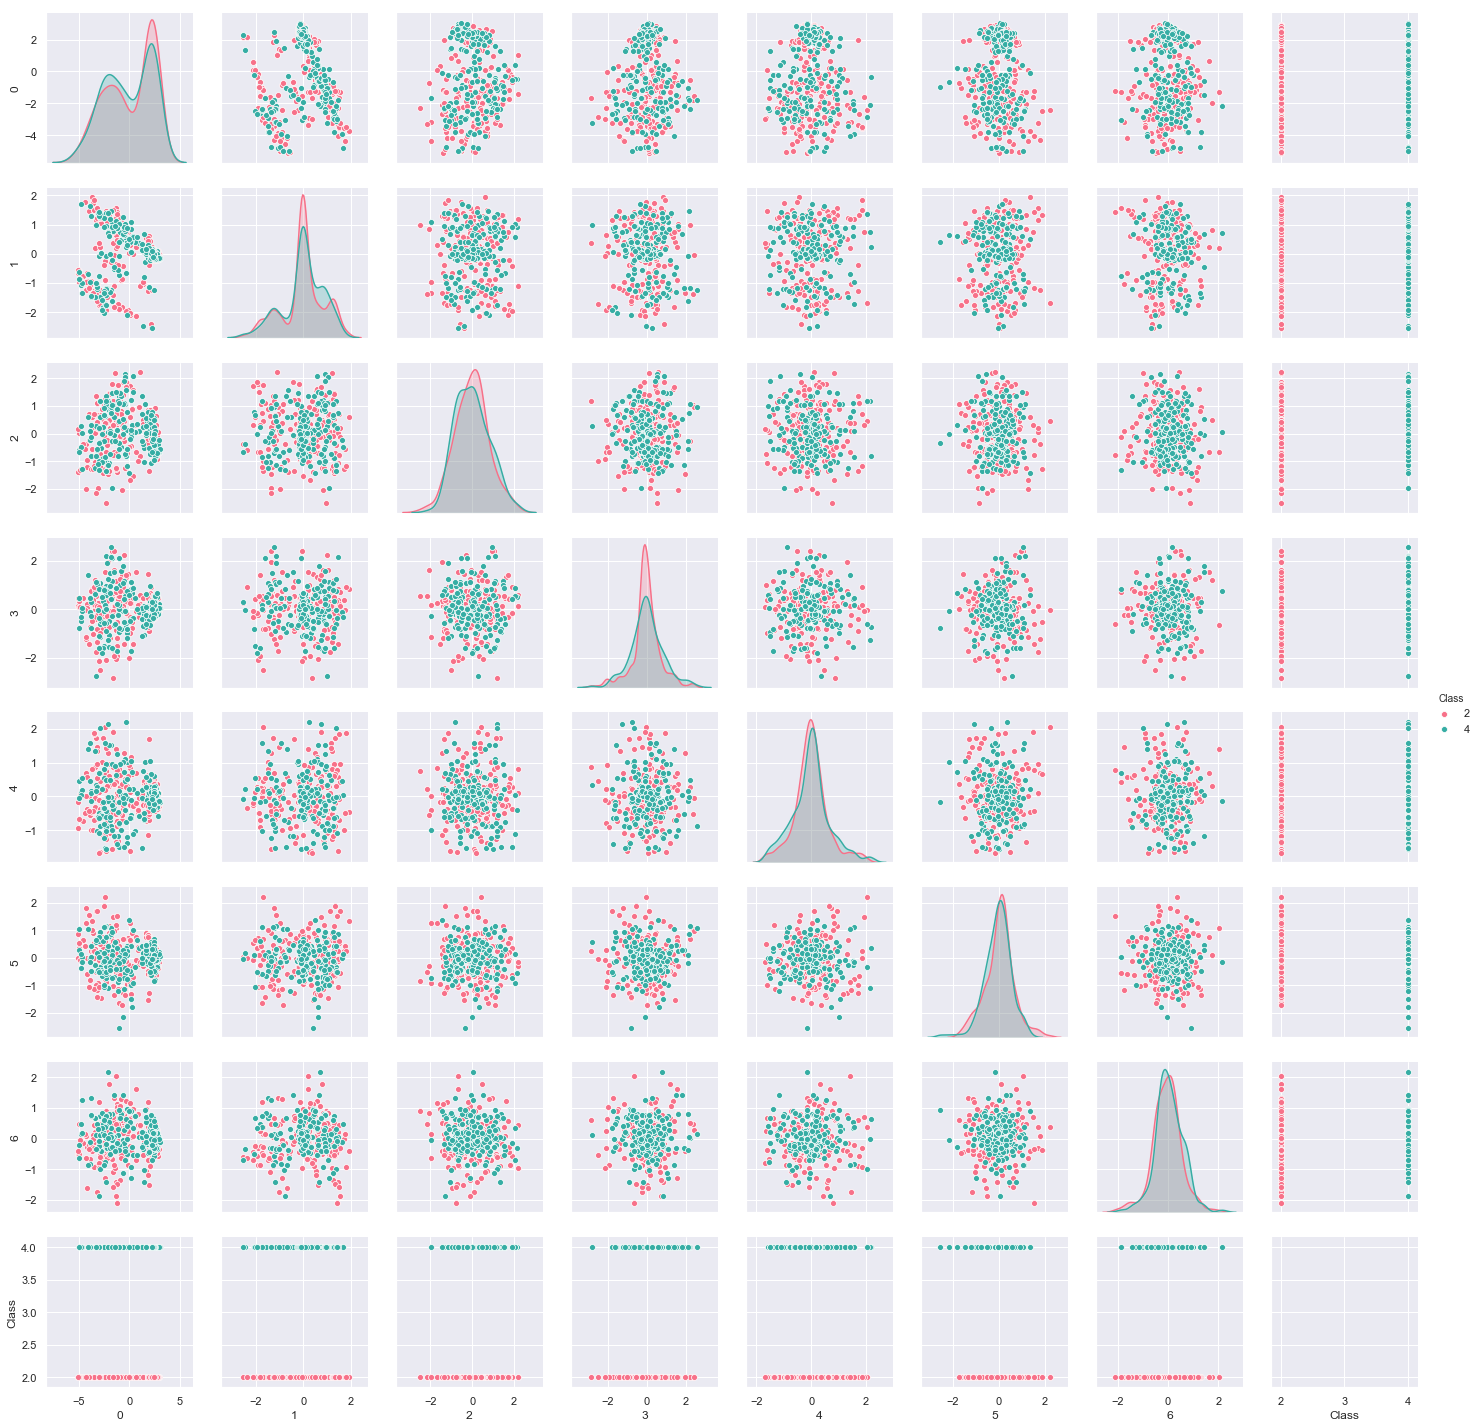

In [113]:
sns.pairplot(Proj_data_can_df,hue="Class", palette="husl")

In [0]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for repeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde', palette="husl", hue = "Class") 